1.Первичная обработка данных

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

student_table = pd.read_csv('stud_math.csv')
display(student_table.head(10))
student_table.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Колонок цифровых значений: 13;
Колонок с объектами: 17

In [177]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=student_table.loc[student_table.loc[:, column].isin(student_table.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
def get_stat_dif(column):
    cols = student_table.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(student_table.loc[student_table.loc[:, column] == comb[0], 'score'], 
                        student_table.loc[student_table.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break   
def filter_outlier(col):
    perc25 = student_table.loc[:, col].quantile(0.25)
    perc75 = student_table.loc[:, col].quantile(0.75)
    IQR = perc75 - perc25
    left = perc25 - 1.5*IQR
    right = perc75 + 1.5*IQR
    return [left, right]

# for out in student_table:
#     border = filter_outlier(out)
#     print(border)
#     new_df = student_table[(student_table[out] >= border[0]) & (student_table[out] <= border[1])]

def famsize_cleaning(student_table):
    if student_table[student_table.famsize == 'GT3']:
        return  
    elif student_table[student_table.famsize == 'LE3']:
        return
    else:
        return student_table.famsize.apply(lambda x: None if x.strip() == '' else x)
    
def cleaning(col)
    if col.d_type==float:
        median = student_table.col.median()
        col.apply(lambda x: float(x.replace('NaN', median)))
        return col
    if col.d_type==object:
        col.apply(lambda x: None if x.strip() == '' else x)
        return col


In [60]:
student_table.columns = ['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'medu', 'fedu', 'mjob', 'fjob', 
                          'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 
                          'activities', 'nursery', 'studytime, granular', 'higher', 'internet', 'romantic', 'famrel', 
                          'freetime', 'goout', 'health', 'absences', 'score'] 
student_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   p_status             350 non-null    object 
 6   medu                 392 non-null    float64
 7   fedu                 371 non-null    float64
 8   mjob                 376 non-null    object 
 9   fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

GP    349
MS     46
Name: school, dtype: int64


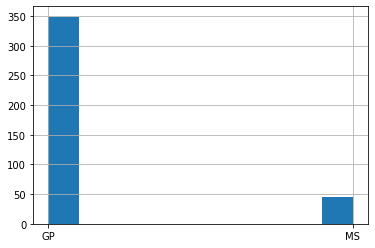

In [42]:
print(student_table.school.value_counts())
student_table.school.hist()

In [ ]:
Колонка sex — пол ученика ('F' - женский, 'M' - мужской)

F    208
M    187
Name: sex, dtype: int64


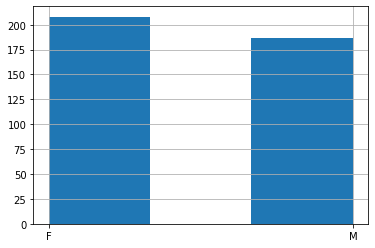

In [70]:
student_table.sex.hist(bins=3)
print(student_table.sex.value_counts())

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

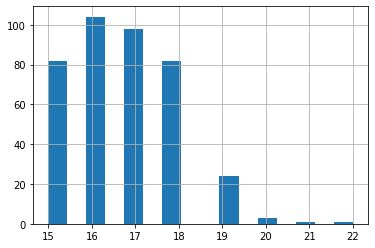

In [34]:
print(student_table.age.value_counts())
student_table.age.hist(bins=16) 

# student_table.drop('age'== '21', axis = 0, inplace = True)
# student_table.drop('age'== '22', axis = 0, inplace = True)
#  Возможно,значения возраста учеников 21 и 22 являются выбросами

student_table.age.describe()


In [124]:
student_table.address = student_table.address.apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(student_table.address.value_counts()))

,address
U,295
R,83


GT3    261
LE3    107
Name: famsize, dtype: int64


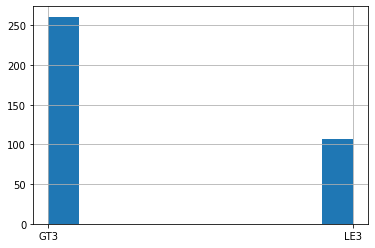

In [181]:
student_table.famsize.unique()
# student_table.apply(famsize_cleaning)
print(student_table.famsize.value_counts())   
# Преимущественное количество учеников воспитывается в семьях численностью больше 3 человек
student_table.famsize.hist()

T    314
A     36
Name: Pstatus, dtype: int64


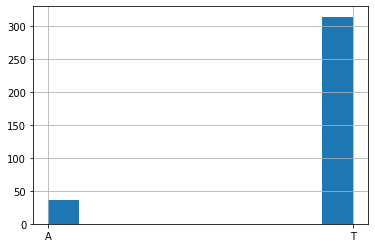

In [52]:
print(student_table.p_status.value_counts())#p_status — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
student_table.Pstatus.hist()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: medu, dtype: int64


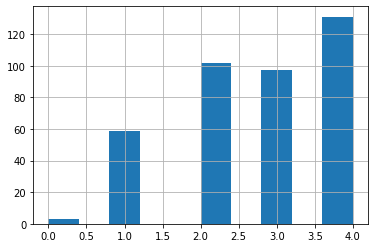

In [73]:
print(student_table.medu.value_counts()) 
# medu - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
student_table.medu.hist()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64


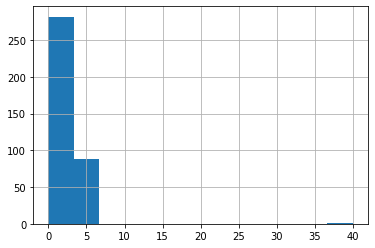

In [81]:
print(student_table.fedu.value_counts())
# fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
student_table.fedu.hist(bins = 12)

other       133
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64


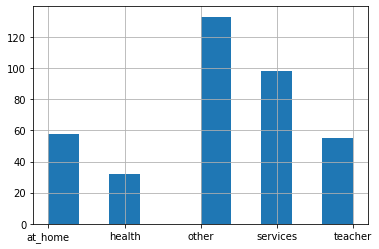

In [75]:
print(student_table.mjob.value_counts())
# mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 
# 'at_home' - не работает, 'other' - другое)
student_table.mjob.hist()

other       197
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64


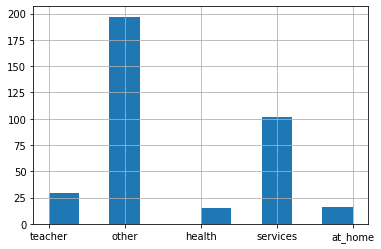

In [76]:
print(student_table.fjob.value_counts())
# fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 
# 'at_home' - не работает, 'other' - другое)
student_table.fjob.hist()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64


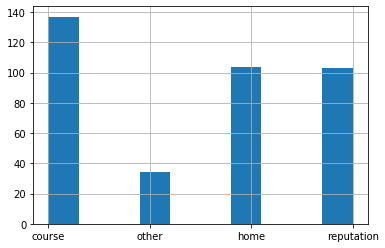

In [77]:
print(student_table.reason.value_counts())
# reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 
# 'course' - образовательная программа, 'other' - другое)
student_table.reason.hist()

mother    250
father     86
other      28
Name: guardian, dtype: int64


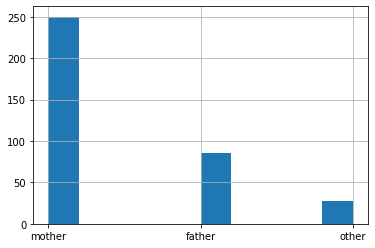

In [83]:
print(student_table.guardian.value_counts())
# guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
student_table.guardian.hist()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64
25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


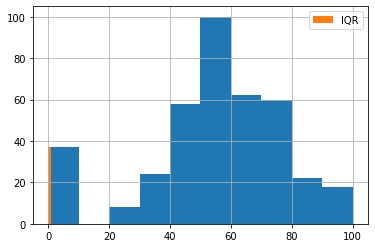

In [88]:
print(student_table.score.value_counts())
student_table.score.hist()
student_table.score.describe()


25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


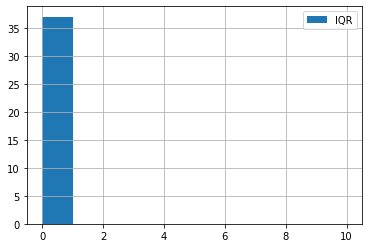

In [89]:
IQR = student_table.score.quantile(0.75) - student_table.score.quantile(0.25)
perc25 = student_table.score.quantile(0.25)
perc75 = student_table.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
student_table.score.loc[student_table.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

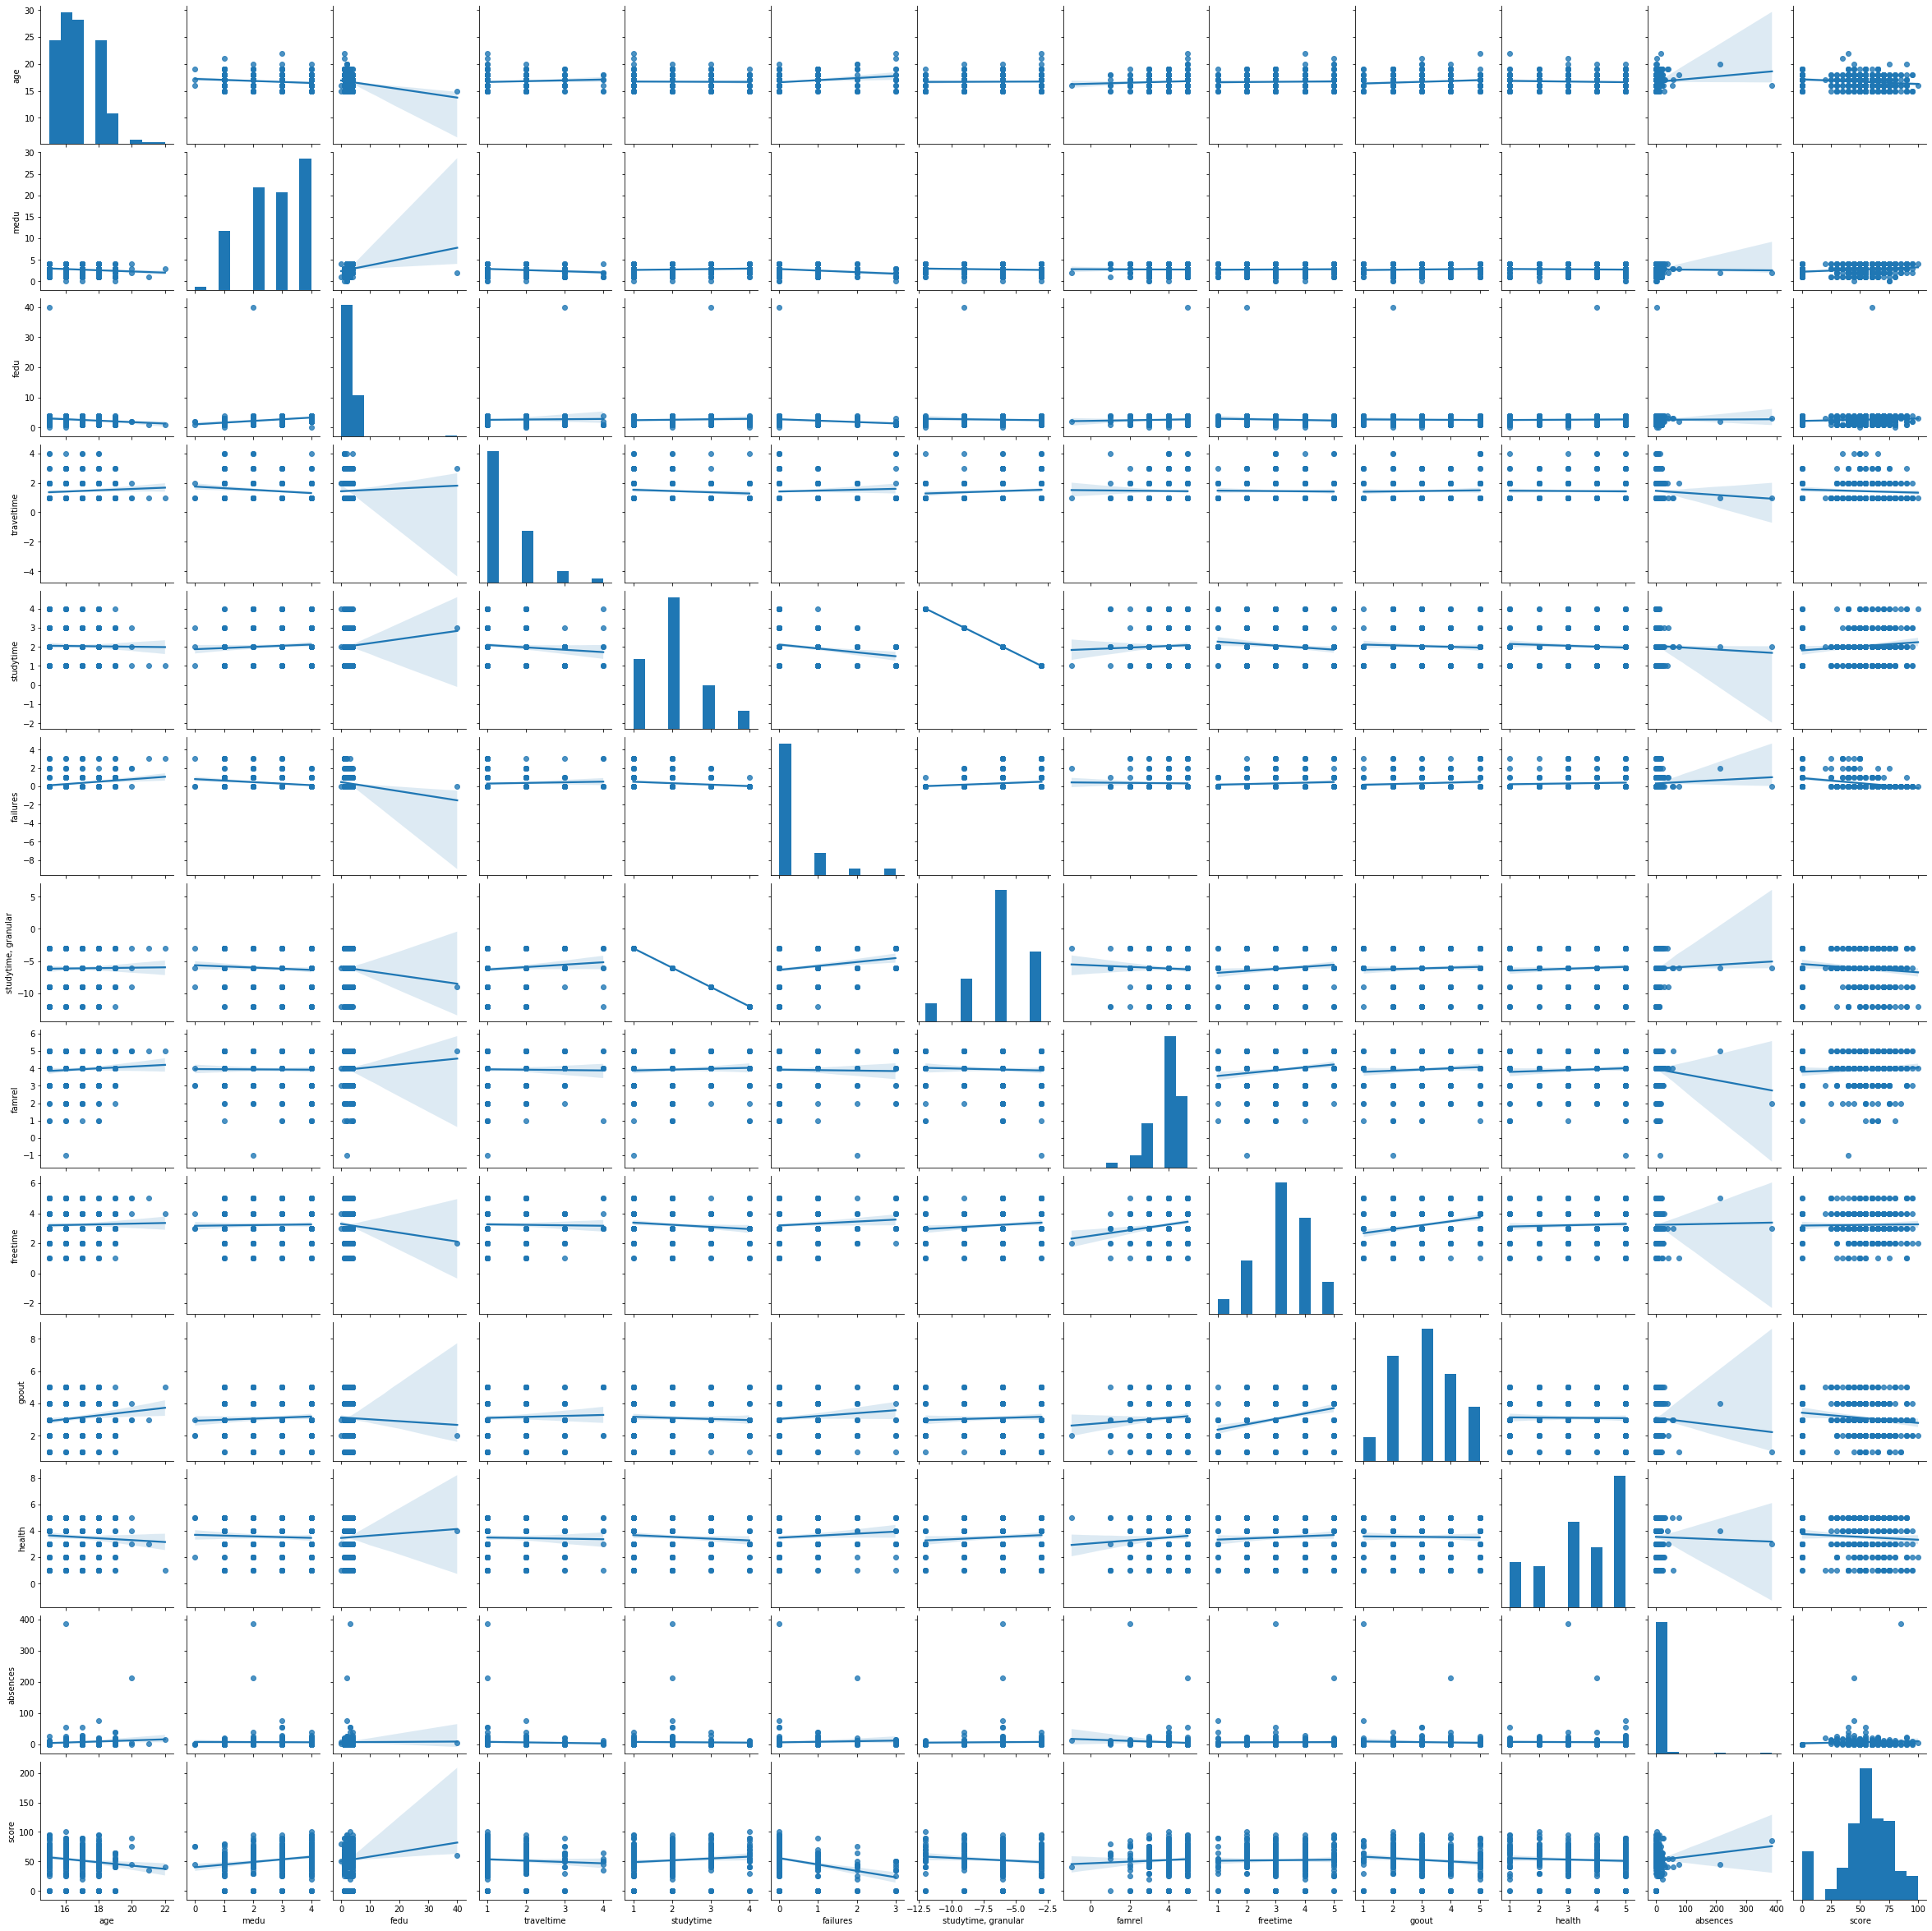

In [93]:
sns.pairplot(student_table, kind = 'reg')

In [90]:
student_table.corr()

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


Выводы:
    1. Отрицательная корреляция успехов в математике наблюдаеься в отношении возраста учеников, 
    времени пути от дома до школы, количества внеучебных неудач и внешкольного обучения, а также 
    состояния здоровья и времени, проведенного с друзьями.
    

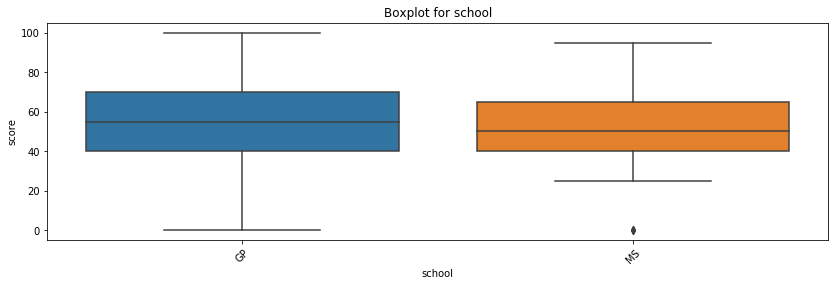

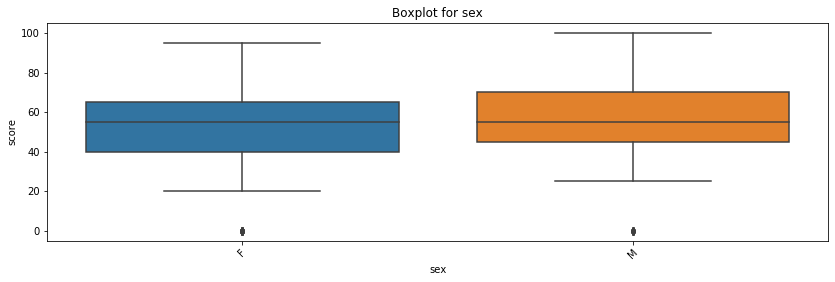

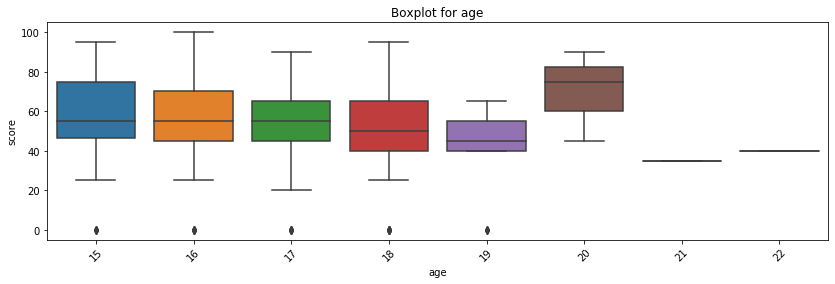

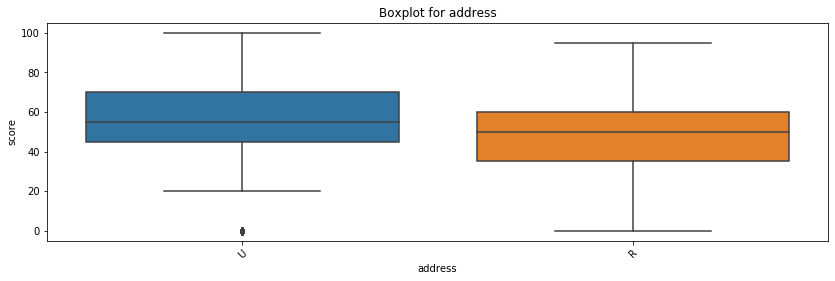

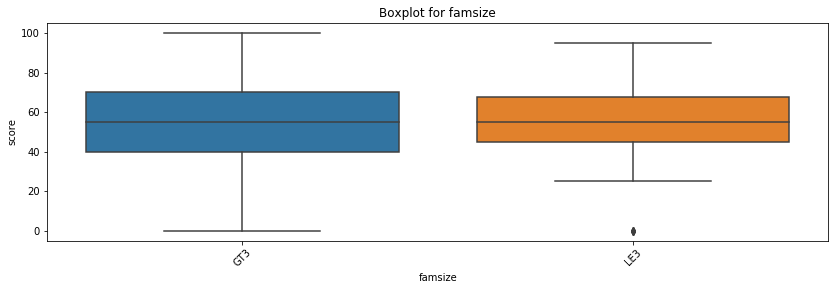

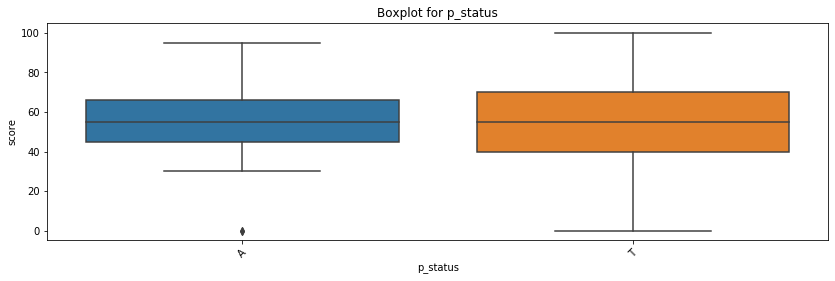

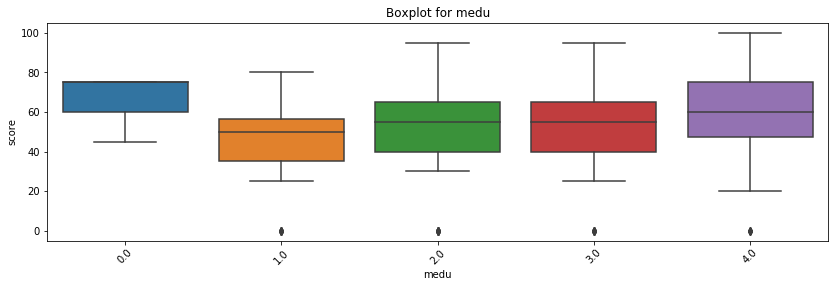

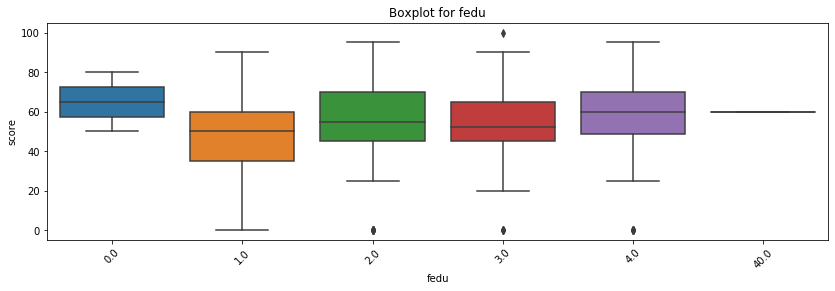

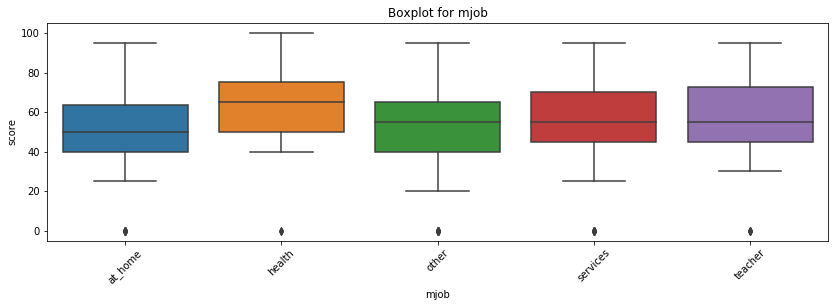

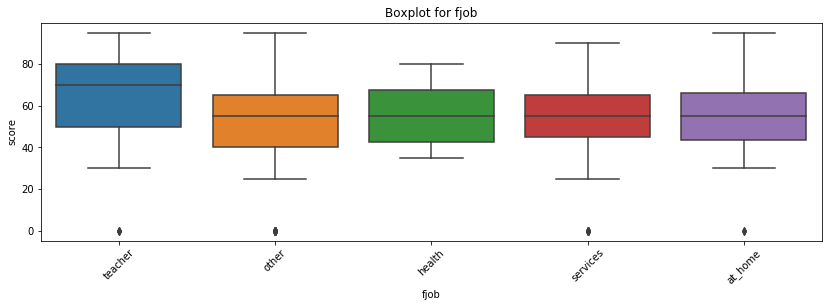

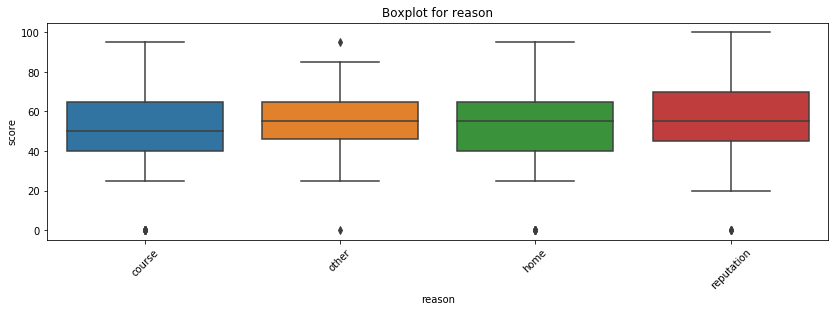

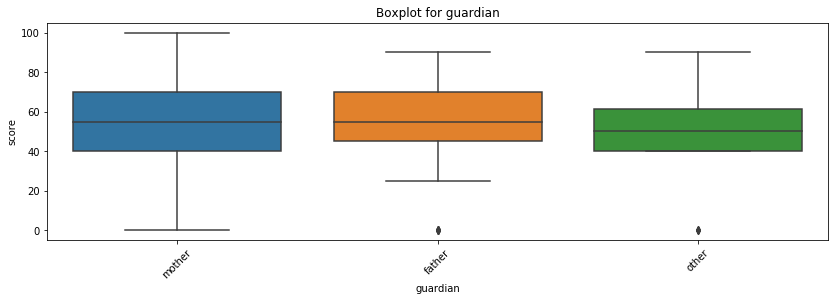

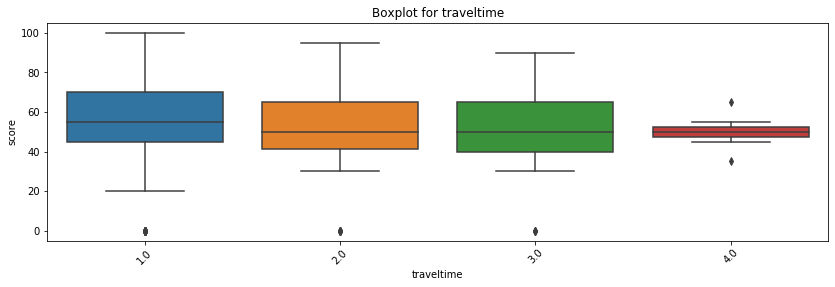

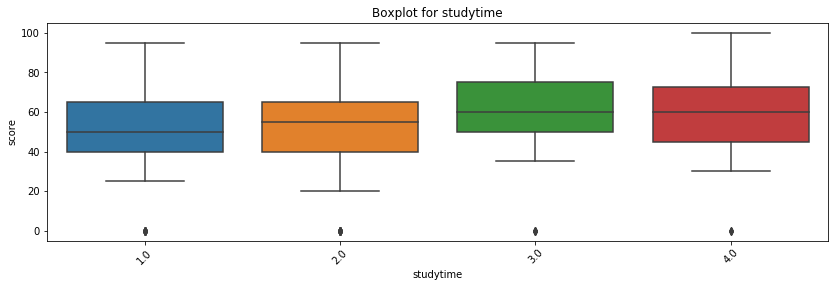

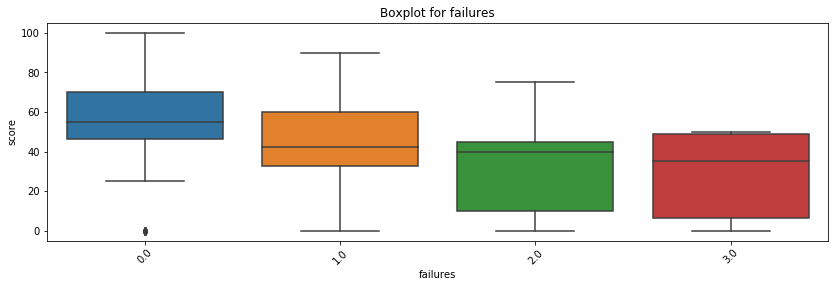

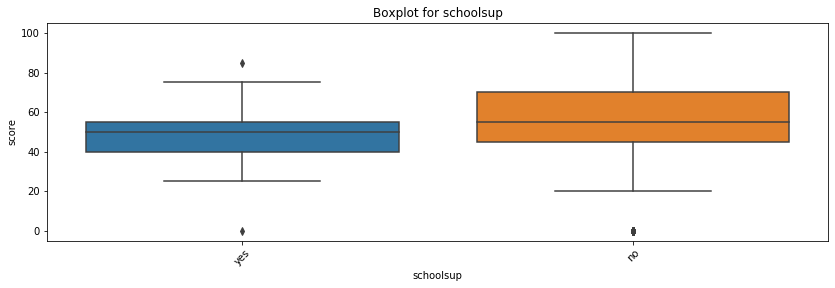

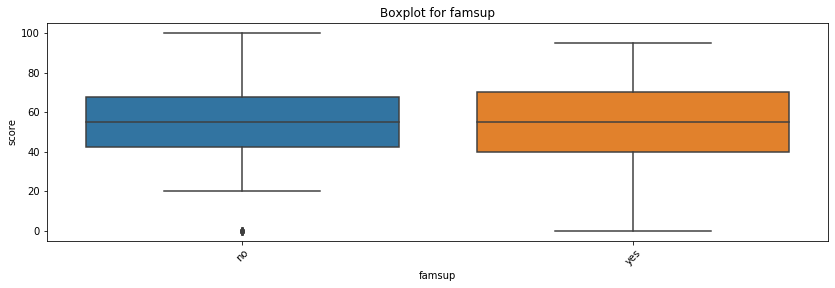

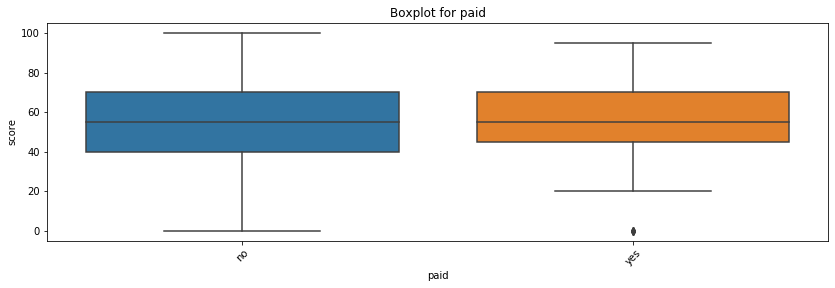

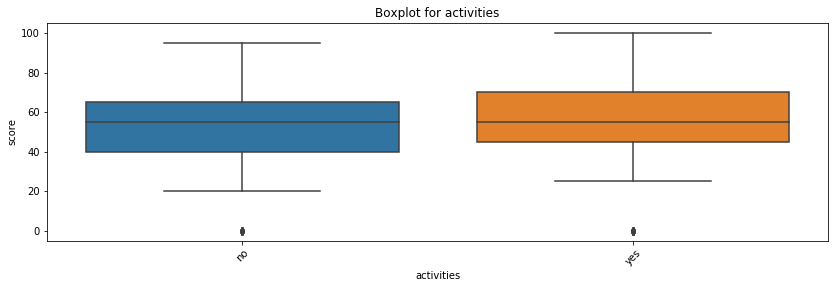

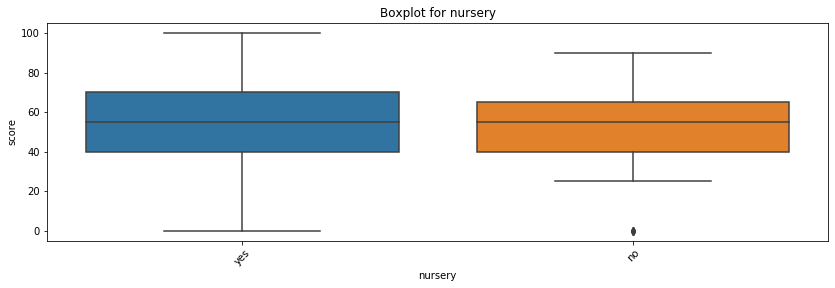

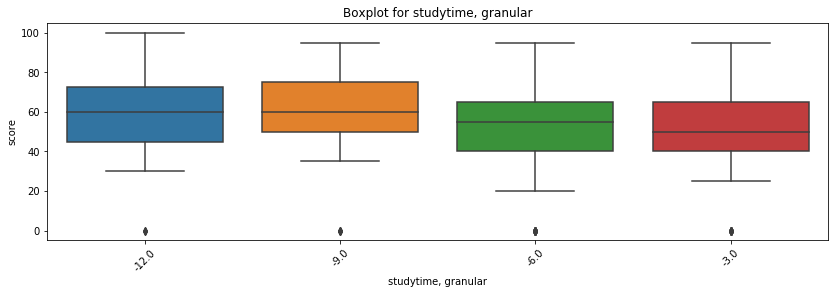

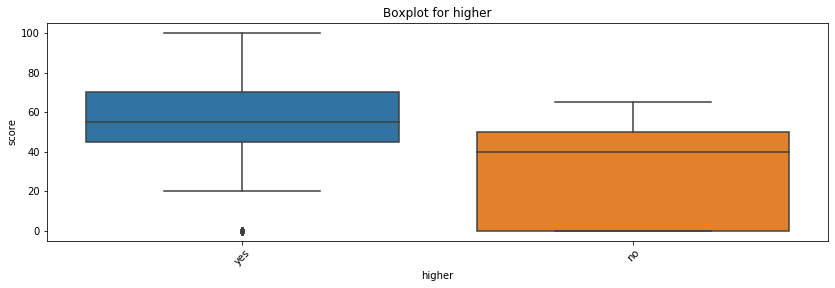

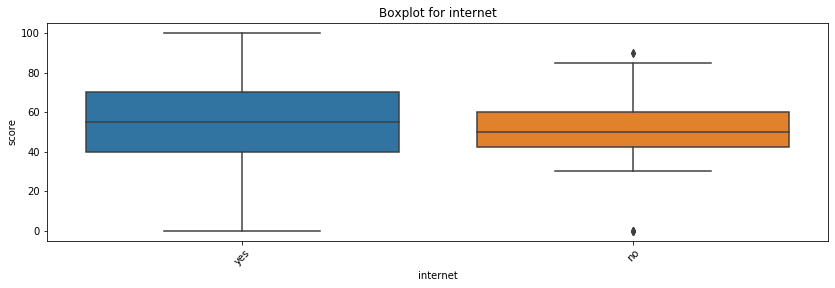

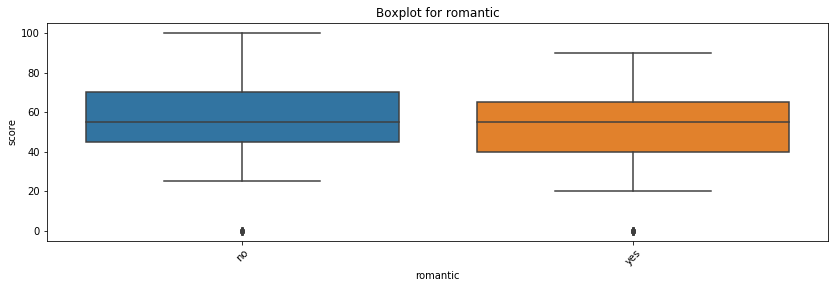

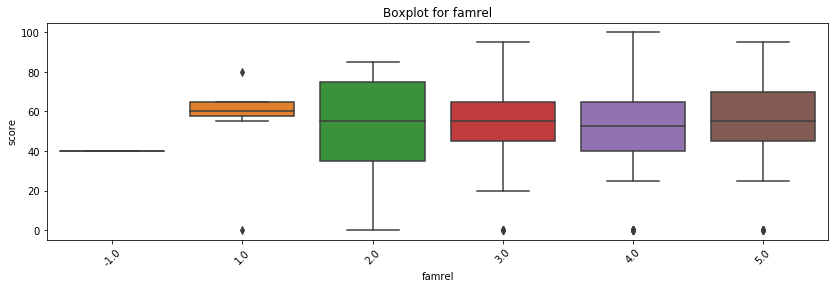

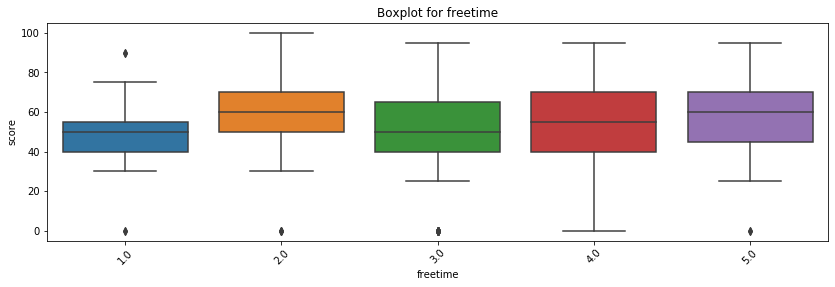

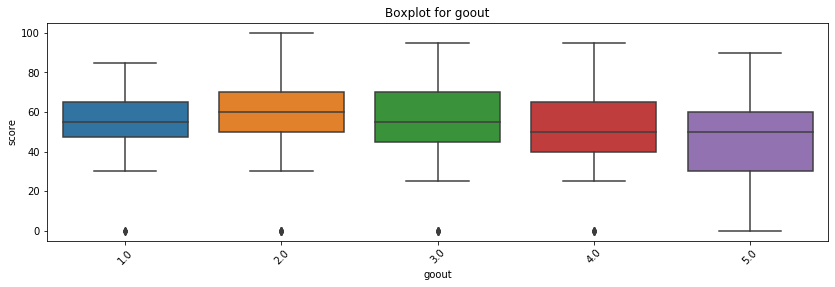

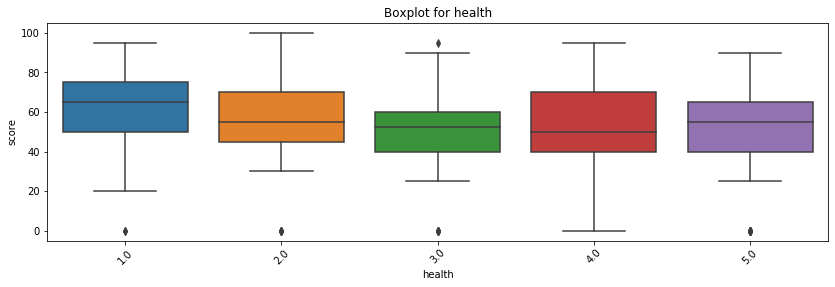

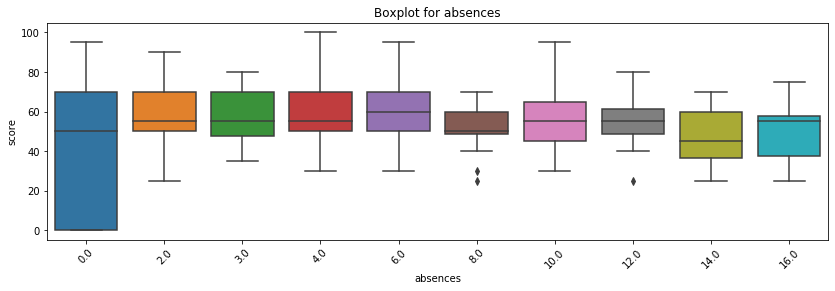

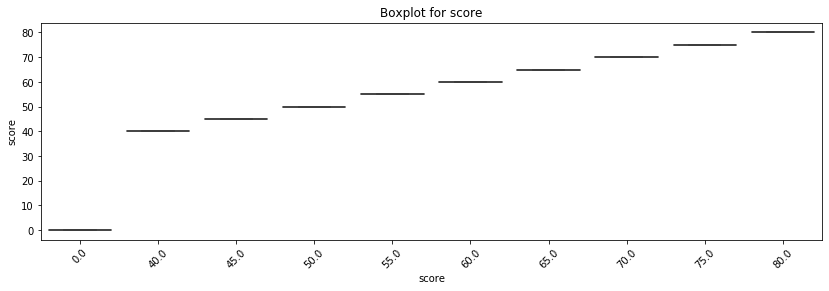

In [96]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'medu', 'fedu', 'mjob', 'fjob', 
                          'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 
                          'activities', 'nursery', 'studytime, granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime',  
                          'goout', 'health', 'absences', 'score']:
    get_boxplot(col)

In [104]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'medu', 'fedu', 'mjob', 'fjob', 
            'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 
            'activities', 'nursery', 'studytime, granular', 'higher', 'internet', 'romantic', 'famrel', 
            'freetime', 'goout', 'health', 'absences', 'score']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки score


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [106]:
student_table_for_model = student_table.loc[:, 
                    ['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'medu', 'fedu', 'mjob', 'fjob', 
            'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 
            'activities', 'nursery', 'studytime, granular', 'higher', 'internet', 'romantic', 'famrel', 
            'freetime', 'goout', 'health', 'absences', 'score']
                                           ]
student_table_for_model.head()

,school,sex,age,address,famsize,p_status,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [7]:
print(student_table.score.mean())


52.26221079691517


In [20]:
grouped_df = student_table.groupby(['age']).mean()
grouped_df


,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,,,,,,,,,,,,
15,3.036585,3.223684,1.337838,2.172840,0.297297,-6.518519,3.986486,3.262500,2.743902,3.550000,3.375000,56.280488
16,2.823529,2.575758,1.387755,1.881188,0.224490,-5.643564,3.805825,3.225490,3.158416,3.712871,9.235294,55.194175
17,2.612245,2.466667,1.472527,2.020833,0.255319,-6.062500,3.921348,3.218750,3.202128,3.461538,6.691489,51.377551
18,2.716049,2.474359,1.565789,2.146341,0.300000,-6.439024,4.040541,3.113924,3.304878,3.400000,6.025316,48.312500
19,2.166667,2.043478,1.478261,2.043478,1.090909,-6.130435,3.869565,3.318182,2.956522,3.478261,10.260870,40.238095
20,3.000000,2.000000,1.333333,2.000000,1.333333,-6.000000,5.000000,4.666667,3.333333,4.000000,72.000000,70.000000
21,1.000000,1.000000,1.000000,1.000000,3.000000,-3.000000,5.000000,5.000000,3.000000,3.000000,3.000000,35.000000
22,3.000000,1.000000,1.000000,1.000000,3.000000,-3.000000,5.000000,4.000000,5.000000,1.000000,16.000000,40.000000


Исходя из данных, можно сказать, что успешность прохождения тестирования 
по математике колеблется в зависимости от возраста учеников(иаксимальные показатели у 15 - 17 лет). 
Также позитивно влияет на успешность дополнительное время, затраченое на учебу, хорошее состояние здоровья.
У учеников с небольшим количеством учебных неудач выше результат тестирования